In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATASET = "thor_magni"
SCENARIO_ID = "Scenario_3"
PATH = f"thor-magni-tools/outputs/data/activities/{SCENARIO_ID}"

In [3]:
sorted(os.listdir(PATH))

['THOR-Magni_120522_SC3A_R1.csv',
 'THOR-Magni_120522_SC3A_R2.csv',
 'THOR-Magni_120522_SC3B_R1.csv',
 'THOR-Magni_120522_SC3B_R2.csv',
 'THOR-Magni_130522_SC3A_R1.csv',
 'THOR-Magni_130522_SC3A_R2.csv',
 'THOR-Magni_130522_SC3B_R1.csv',
 'THOR-Magni_130522_SC3B_R2.csv',
 'THOR-Magni_170522_SC3A_R1.csv',
 'THOR-Magni_170522_SC3A_R2.csv',
 'THOR-Magni_170522_SC3B_R1.csv',
 'THOR-Magni_170522_SC3B_R2.csv',
 'THOR-Magni_180522_SC3A_R1.csv',
 'THOR-Magni_180522_SC3A_R2.csv',
 'THOR-Magni_180522_SC3B_R1.csv',
 'THOR-Magni_180522_SC3B_R2.csv']

In [4]:
FILE = 'THOR-Magni_120522_SC3A_R1.csv'

In [5]:
merged_df = pd.read_csv(os.path.join(PATH, FILE))

In [6]:
merged_df

,Time,frame_id,x,y,z,ag_id,data_label,file_name,qtm_frame_act,activity
0,0.01,1,NaN,NaN,NaN,Helmet_10,Carrier-Box,THOR-Magni_120522_SC3A_R1.csv,1,PickBox
1,0.01,1,-6955.7860,1525.5610,1743.4700,Helmet_6,Visitors-Group 3,THOR-Magni_120522_SC3A_R1.csv,323,Walk
2,0.41,41,-6968.9775,1581.5320,1748.1740,Helmet_6,Visitors-Group 3,THOR-Magni_120522_SC3A_R1.csv,323,Walk
3,0.41,41,NaN,NaN,NaN,Helmet_10,Carrier-Box,THOR-Magni_120522_SC3A_R1.csv,41,PickBox
4,0.81,81,NaN,NaN,NaN,Helmet_10,Carrier-Box,THOR-Magni_120522_SC3A_R1.csv,81,WalkBox
...,...,...,...,...,...,...,...,...,...,...
1211,242.01,24201,-8018.6225,-1838.6335,1945.0795,Helmet_10,Carrier-Box,THOR-Magni_120522_SC3A_R1.csv,22642,DeliverBox
1212,242.41,24241,-1098.2685,-2218.8345,1732.5390,Helmet_6,Visitors-Group 3,THOR-Magni_120522_SC3A_R1.csv,24071,Walk
1213,242.41,24241,-8004.7250,-1800.8940,1946.7390,Helmet_10,Carrier-Box,THOR-Magni_120522_SC3A_R1.csv,22642,DeliverBox
1214,242.81,24281,-7909.3530,-1817.6615,1946.3660,Helmet_10,Carrier-Box,THOR-Magni_120522_SC3A_R1.csv,22642,DeliverBox


In [9]:
def get_groups_continuous_tracking(dynamic_agent_data: pd.DataFrame):
    """get groups of continuous tracking/no-tracking"""
    mask = dynamic_agent_data[["x", "y"]].isna().any(axis=1)
    groups = (mask != mask.shift()).cumsum()
    groups_of_continuous_tracking = dynamic_agent_data.groupby(groups)
    return groups_of_continuous_tracking


def visualize_activities(activities_trajs_merged: pd.DataFrame):
    all_act = list(activities_trajs_merged["activity"].unique())
    activities_colors = plt.cm.get_cmap(
        "tab20", len(all_act)
    )
    helmets = activities_trajs_merged["ag_id"].unique()
    fig, axs = plt.subplots(nrows=1, ncols=len(helmets), figsize=(6 * len(helmets), 6))
    for i, helmet in enumerate(helmets):
        ax_handler = axs if len(helmets) == 1 else axs[i]
        helmet_df = activities_trajs_merged[activities_trajs_merged["ag_id"] == helmet]
        role = helmet_df["data_label"].iloc[0]
        ax_handler.set_title(f"{helmet} with {role} role", fontsize=14)
        unique_activities = helmet_df["activity"].unique()
        for activity in unique_activities:
            if not isinstance(activity, str):
                continue
            tracklet_act = helmet_df[helmet_df["activity"] == activity]
            groups_of_continuous_tracking = get_groups_continuous_tracking(
                tracklet_act
            )
            lbls = 0
            for _, group in groups_of_continuous_tracking:
                if group[["x", "y", "z"]].isna().any(axis=0).all():
                    continue
                else:
                    lbls+=1
                act = group["activity"].iloc[0]
                ax_handler.scatter(
                    group["x"]/1000,
                    group["y"]/1000,
                    label=act if lbls == 1 else "",
                    color=activities_colors(all_act.index(act)),
                )
        ax_handler.legend(fontsize=14)
        ax_handler.set_xlim([-9,10]);
        ax_handler.set_ylim([-4.5,4.5]);
    fig.tight_layout()

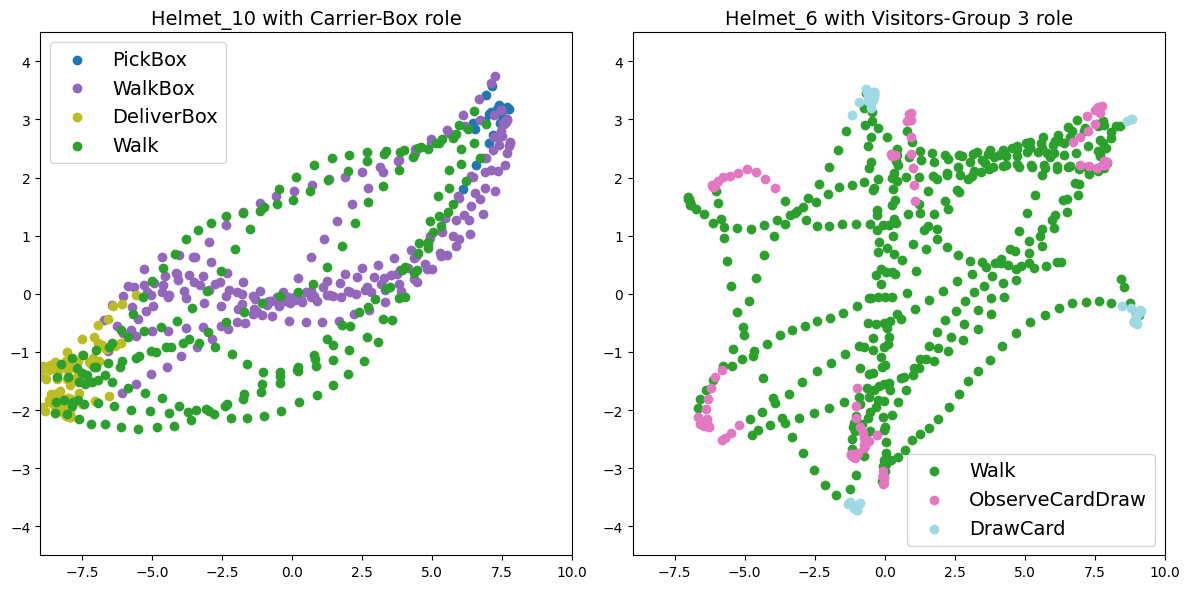

In [11]:
visualize_activities(merged_df)